# Luento 2: Kuvaileva analytiikka (osa 1, 21.1.2026)

In [2]:
# tuodaan tarvittavat kirastot
import pandas as pd

# grafiikkaa varten
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [23]:
# tyylimäärittely
sns.set_style("white")

## Aineiston luonti

In [3]:
df = pd.read_excel("data1.xlsx")
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Frekvenssijakauma

In [ ]:
# muodostetaan yksinkertainen frekvenssitaulu

df1 = pd.crosstab(df["koulutus"], "f")

# poistetaan col_0
df1.columns.name = ""

# korvataan luvut 1, 2, 3, 4 vastaavilla koulutustasoilla
koulutus = ["koulutus", "2. aste", "korkeakoulu", "ylempi korkeakoulu"]
df1.index = koulutus

# lisätään prosenttisarake
n = df1["f"].sum()
df1["%"] = df1["f"]/n*100

# Yhteensä-rivi
df1.loc["Yhteensä"] = df1.sum()

df1.style.format({"f": "{:.0f}", "%": "{:.1f}"})

,f,%
koulutus,27,33.3
2. aste,30,37.0
korkeakoulu,22,27.2
ylempi korkeakoulu,2,2.5
Yhteensä,81,100.0


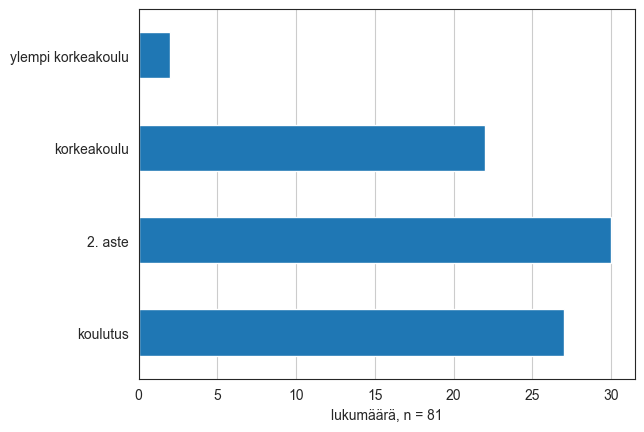

In [25]:
# muodostetaan palkkikaavio kuvaamaan yllä olevaa frekvenssitaulua ilman yhteensä-riviä

# tiputetaan yhteensä pois:
df2 = df1.drop("Yhteensä")

# luodaan palkkikaavio
df2["f"].plot(kind="barh")

# lisätään x-akselille otsikko
plt.xlabel(f"lukumäärä, n = {n}")

# lisätään taustaviivoitus
plt.grid(axis="x")

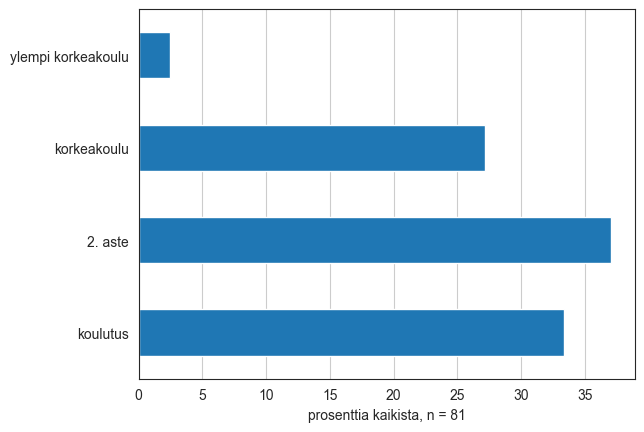

In [24]:
# muodostetaan palkkikaavio prosenteille

# luodaan palkkikaavio
df2["%"].plot(kind="barh")

# lisätään x-akselille otsikko
plt.xlabel(f"prosenttia kaikista, n = {n}")

# lisätään taustaviivoitus
plt.grid(axis="x")

## Luokiteltu jakauma

In [27]:
# HUOM! NÄIN EI KUULU TEHDÄ
# pd.crosstab(df["palkka"], "f")

In [28]:
# pienin palkka
df["palkka"].min()

np.int64(1521)

In [ ]:
# suurin palkka
df["palkka"].max()

np.int64(6278)

In [30]:
# luodaan uusi luokiteltu muuttuja

rajat = [1500, 2500, 3500, 4500, 5500, 6500]

# lisätään df-taulukkoon uusi muuttuja "palkkaluokka"
df["palkkaluokka"] = pd.cut(df["palkka"], bins=rajat)

df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,palkkaluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(3500, 4500]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(2500, 3500]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(1500, 2500]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(1500, 2500]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(1500, 2500]"


In [38]:
# luodaan palkkaluokalle frekvenssitaulu

df3 = pd.crosstab(df["palkkaluokka"], "f")

# tiputetaan col_3
df3.columns.name = ""

# lisätään prosenttisarake
n_palkka = df3["f"].sum()
df3["%"] = df3["f"]/n_palkka*100

# lisätään yhteensä-rivi
df3.loc["Yhteensä"] = df3.sum()

tyyli = {"f": "{:.0f}", "%": "{:.1f}"}
df3.style.format(tyyli)

,f,%
palkkaluokka,,
"(1500, 2500]",47,57.3
"(2500, 3500]",26,31.7
"(3500, 4500]",5,6.1
"(4500, 5500]",3,3.7
"(5500, 6500]",1,1.2
Yhteensä,82,100.0


## Histogrammi

Muodostetaan palkkajakaumaa kuvaava histogrammi.

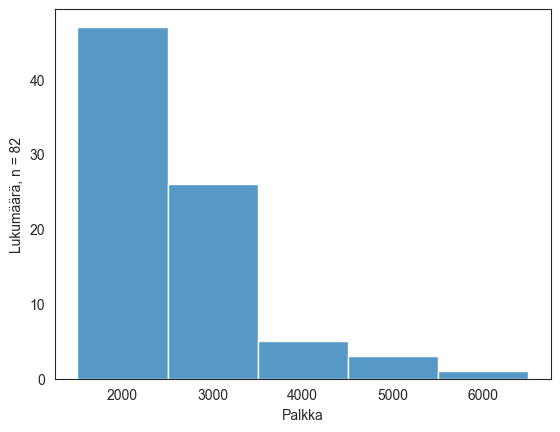

In [43]:
# käytetään Seaborn-kirjastoa ja aiemmin määriteltyjä luokkarajoja

sns.histplot(df["palkka"], bins=rajat)

# muokataan otsikoita
plt.xlabel("Palkka")
plt.ylabel(f"Lukumäärä, n = {n_palkka}")

plt.show()

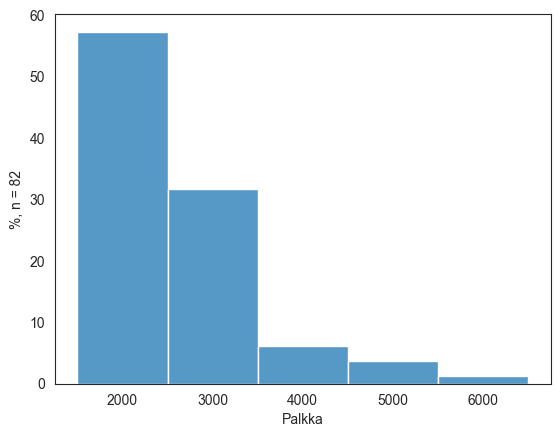

In [45]:
# luodaan histogrammi prosenteista

sns.histplot(df["palkka"], bins=rajat, stat="percent")

# muokataan otsikoita
plt.xlabel("Palkka")
plt.ylabel(f"%, n = {n_palkka}")

plt.show()

## Dikotomisten muuttujien frekvenssit

In [50]:
# muodostetaan uusi dataframe, josse on ainoastaan neljä dikotomista muuttujaa
muuttujat = ["työterv", "lomaosa", "kuntosa", "hieroja"]
nimet = ["työterveys", "lomaosake", "kuntosali", "hieroja"]

# muodostetaan pienempi dataframe
df_dikot = df[muuttujat]

# korvataan lyhenteet varsinaisilla nimillä
df_dikot.columns = nimet

df_dikot.head()

,työterveys,lomaosake,kuntosali,hieroja
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN


In [58]:
# kerätään dikotomisiin muuttujiin liittyjät frekvenssit yhteen taulukkoon

arvot = df_dikot.sum().sort_values(ascending=False).to_frame("f")

# lisätään prosentit
arvot["%"] = arvot["f"]/df.shape[0]*100

arvot.style.format(tyyli)

,f,%
työterveys,47,57.3
hieroja,22,26.8
lomaosake,20,24.4
kuntosali,9,11.0


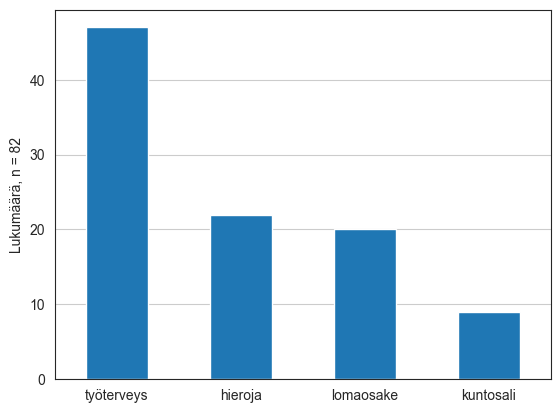

In [64]:
# muodostetaan pylväskaavio edellä lasketuista frekvensseistä
arvot["f"].plot(kind="bar", rot=0)
plt.ylabel(f"Lukumäärä, n = {df.shape[0]}")
plt.grid(axis="y")

## Pingviinit

In [66]:
# tuodaan pingviiniaineisto Seaborn-kirjastosta
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
